In [45]:
import pandas as pd
import numpy as np
import scipy as sp
from scipy import integrate as itg
from matplotlib import pyplot as plt
from scipy import signal
sunny_1 = pd.read_csv('C:\\Users\\Sam\\Documents\\Signals\\sunny_1.csv', header=0)
sunny_2 = pd.read_csv('C:\\Users\\Sam\\Documents\\Signals\\sunny_2.csv', header=0)
sam_1 = pd.read_csv('C:\\Users\\Sam\\Documents\\Signals\\sam_1.csv', header=0)
sam_2 = pd.read_csv('C:\\Users\\Sam\\Documents\\Signals\\sam_2.csv', header=0)
vince_1 = pd.read_csv('C:\\Users\\Sam\\Documents\\Signals\\vincent_data.csv', header=0)

del sunny_1['Unnamed: 7']
del sunny_2['Unnamed: 7']
del sam_1['Unnamed: 7']
del sam_2['Latitude']
del sam_2['Longitude']
del sam_2['Unnamed: 9']
del vince_1['Unnamed: 7']

In [4]:
sunny_1_int1 = pd.DataFrame(columns=['time','ax_1','ay_1','az_1','wx_1','wy_1','wz_1'])
sunny_2_int1 = pd.DataFrame(columns=['time','ax_1','ay_1','az_1','wx_1','wy_1','wz_1'])
sam_1_int1 = pd.DataFrame(columns=['time','ax_1','ay_1','az_1','wx_1','wy_1','wz_1'])
sam_2_int1 = pd.DataFrame(columns=['time','ax_1','ay_1','az_1','wx_1','wy_1','wz_1'])
vince_1_int1 = pd.DataFrame(columns=['time','ax_1','ay_1','az_1','wx_1','wy_1','wz_1'])

sunny_1_int2 = pd.DataFrame(columns=['time','ax_2','ay_2','az_2'])
sunny_2_int2 = pd.DataFrame(columns=['time','ax_2','ay_2','az_2'])
sam_1_int2 = pd.DataFrame(columns=['time','ax_2','ay_2','az_2'])
sam_2_int2 = pd.DataFrame(columns=['time','ax_2','ay_2','az_2'])
vince_1_int2 = pd.DataFrame(columns=['time','ax_2','ay_2','az_2'])

avg = pd.DataFrame(columns=['ax','ay','az','wx','wy','wz','ax_1','ay_1','az_1','wx_1','wy_1','wz_1','ax_2','ay_2','az_2'], 
                      index=['sunny_1', 'sunny_2', 'sam_1','sam_2', 'vince_1'])
maxs = pd.DataFrame(columns=['ax','ay','az','wx','wy','wz','ax_1','ay_1','az_1','wx_1','wy_1','wz_1','ax_2','ay_2','az_2'], 
                      index=['sunny_1', 'sunny_2', 'sam_1','sam_2', 'vince_1'])

In [5]:
# first integration
for _dir in ['x', 'y', 'z']:
    for _type in ['a', 'w']:
        sunny_1_int1['{}{}_1'.format(_type, _dir)] = itg.cumtrapz(sunny_1['{}{}'.format(_type, _dir)], sunny_1['time'])
        sunny_1_int1['time'] = sunny_1['time']
        sunny_2_int1['{}{}_1'.format(_type, _dir)] = itg.cumtrapz(sunny_2['{}{}'.format(_type, _dir)], sunny_2['time'])
        sunny_2_int1['time'] = sunny_2['time']
        
        sam_1_int1['{}{}_1'.format(_type, _dir)] = itg.cumtrapz(sam_1['{}{}'.format(_type, _dir)], sam_1['time'])
        sam_1_int1['time'] = sam_1['time']
        sam_2_int1['{}{}_1'.format(_type, _dir)] = itg.cumtrapz(sam_2['{}{}'.format(_type, _dir)], sam_2['time'])
        sam_2_int1['time'] = sam_2['time']
        
        vince_1_int1['{}{}_1'.format(_type, _dir)] = itg.cumtrapz(vince_1['{}{}'.format(_type, _dir)], vince_1['time'])
        vince_1_int1['time'] = vince_1['time']        

In [6]:
# second integration
for _dir in ['x', 'y', 'z']:
    sunny_1_int2['a{}_2'.format(_dir)] = itg.cumtrapz(sunny_1_int1['a{}_1'.format(_dir)], sunny_1_int1['time'])
    sunny_1_int2['time'] = sunny_1_int1['time']
    sunny_2_int2['a{}_2'.format(_dir)] = itg.cumtrapz(sunny_2_int1['a{}_1'.format(_dir)], sunny_2_int1['time'])
    sunny_2_int2['time'] = sunny_2_int1['time']

    sam_1_int2['a{}_2'.format(_dir)] = itg.cumtrapz(sam_1_int1['a{}_1'.format(_dir)], sam_1_int1['time'])
    sam_1_int2['time'] = sam_1_int1['time']
    sam_2_int2['a{}_2'.format(_dir)] = itg.cumtrapz(sam_2_int1['a{}_1'.format(_dir)], sam_2_int1['time'])
    sam_2_int2['time'] = sam_2_int1['time']

    vince_1_int2['a{}_2'.format(_dir)] = itg.cumtrapz(vince_1_int1['a{}_1'.format(_dir)], vince_1_int1['time'])
    vince_1_int2['time'] = vince_1_int1['time']

In [8]:
# determining overall accelerations, angular velocities, velocities, distances, and angles
for _type in ['a', 'w']:
    sunny_1['overall_{}'.format(_type)] = np.sqrt(np.square(sunny_1['{}x'.format(_type)]) + np.square(sunny_1['{}y'.format(_type)])  + np.square(sunny_1['{}z'.format(_type)]))
    sunny_2['overall_{}'.format(_type)] = np.sqrt(np.square(sunny_2['{}x'.format(_type)]) + np.square(sunny_2['{}y'.format(_type)])  + np.square(sunny_2['{}z'.format(_type)]))
    sam_1['overall_{}'.format(_type)] = np.sqrt(np.square(sam_1['{}x'.format(_type)]) + np.square(sam_1['{}y'.format(_type)])  + np.square(sam_1['{}z'.format(_type)]))
    sam_2['overall_{}'.format(_type)] = np.sqrt(np.square(sam_2['{}x'.format(_type)]) + np.square(sam_2['{}y'.format(_type)])  + np.square(sam_2['{}z'.format(_type)]))
    vince_1['overall_{}'.format(_type)] = np.sqrt(np.square(vince_1['{}x'.format(_type)]) + np.square(vince_1['{}y'.format(_type)])  + np.square(vince_1['{}z'.format(_type)]))

    sunny_1_int1['overall_{}_1'.format(_type)] = np.sqrt(np.square(sunny_1_int1['{}x_1'.format(_type)]) + np.square(sunny_1_int1['{}y_1'.format(_type)])  + np.square(sunny_1_int1['{}z_1'.format(_type)]))
    sunny_2_int1['overall_{}_1'.format(_type)] = np.sqrt(np.square(sunny_2_int1['{}x_1'.format(_type)]) + np.square(sunny_2_int1['{}y_1'.format(_type)])  + np.square(sunny_2_int1['{}z_1'.format(_type)]))
    sam_1_int1['overall_{}_1'.format(_type)] = np.sqrt(np.square(sam_1_int1['{}x_1'.format(_type)]) + np.square(sam_1_int1['{}y_1'.format(_type)])  + np.square(sam_1_int1['{}z_1'.format(_type)]))
    sam_2_int1['overall_{}_1'.format(_type)] = np.sqrt(np.square(sam_2_int1['{}x_1'.format(_type)]) + np.square(sam_2_int1['{}y_1'.format(_type)])  + np.square(sam_2_int1['{}z_1'.format(_type)]))
    vince_1_int1['overall_{}_1'.format(_type)] = np.sqrt(np.square(vince_1_int1['{}x_1'.format(_type)]) + np.square(vince_1_int1['{}y_1'.format(_type)])  + np.square(vince_1_int1['{}z_1'.format(_type)]))

    if _type == 'a':
        sunny_1_int2['overall_{}_2'.format(_type)] = np.sqrt(np.square(sunny_1_int2['{}x_2'.format(_type)]) + np.square(sunny_1_int2['{}y_2'.format(_type)])  + np.square(sunny_1_int2['{}z_2'.format(_type)]))
        sunny_2_int2['overall_{}_2'.format(_type)] = np.sqrt(np.square(sunny_2_int2['{}x_2'.format(_type)]) + np.square(sunny_2_int2['{}y_2'.format(_type)])  + np.square(sunny_2_int2['{}z_2'.format(_type)]))
        sam_1_int2['overall_{}_2'.format(_type)] = np.sqrt(np.square(sam_1_int2['{}x_2'.format(_type)]) + np.square(sam_1_int2['{}y_2'.format(_type)])  + np.square(sam_1_int2['{}z_2'.format(_type)]))
        sam_2_int2['overall_{}_2'.format(_type)] = np.sqrt(np.square(sam_2_int2['{}x_2'.format(_type)]) + np.square(sam_2_int2['{}y_2'.format(_type)])  + np.square(sam_2_int2['{}z_2'.format(_type)]))
        vince_1_int2['overall_{}_2'.format(_type)] = np.sqrt(np.square(vince_1_int2['{}x_2'.format(_type)]) + np.square(vince_1_int2['{}y_2'.format(_type)])  + np.square(vince_1_int2['{}z_2'.format(_type)]))

In [15]:
# getting absolute averages and maximums
for _dir in ['x', 'y', 'z']:
    for _type in ['a', 'w']:
        if _type == 'a':
            avg.loc['sunny_1', '{}{}'.format(_type, _dir)] = np.mean(np.absolute(sunny_1['{}{}'.format(_type, _dir)]))
            avg.loc['sunny_1', '{}{}_1'.format(_type, _dir)] = np.mean(np.absolute(sunny_1_int1['{}{}_1'.format(_type, _dir)]))
            avg.loc['sunny_1', '{}{}_2'.format(_type, _dir)] = np.mean(np.absolute(sunny_1_int2['{}{}_2'.format(_type, _dir)]))
            maxs.loc['sunny_1', '{}{}'.format(_type, _dir)] = np.max(sunny_1['{}{}'.format(_type, _dir)])
            maxs.loc['sunny_1', '{}{}_1'.format(_type, _dir)] = np.max(sunny_1_int1['{}{}_1'.format(_type, _dir)])
            maxs.loc['sunny_1', '{}{}_2'.format(_type, _dir)] = np.max(sunny_1_int2['{}{}_2'.format(_type, _dir)])

            avg.loc['sunny_2', '{}{}'.format(_type, _dir)] = np.mean(np.absolute(sunny_2['{}{}'.format(_type, _dir)]))
            avg.loc['sunny_2', '{}{}_1'.format(_type, _dir)] = np.mean(np.absolute(sunny_2_int1['{}{}_1'.format(_type, _dir)]))
            avg.loc['sunny_2', '{}{}_2'.format(_type, _dir)] = np.mean(np.absolute(sunny_2_int2['{}{}_2'.format(_type, _dir)]))
            maxs.loc['sunny_2', '{}{}'.format(_type, _dir)] = np.max(sunny_2['{}{}'.format(_type, _dir)])
            maxs.loc['sunny_2', '{}{}_1'.format(_type, _dir)] = np.max(sunny_2_int1['{}{}_1'.format(_type, _dir)])
            maxs.loc['sunny_2', '{}{}_2'.format(_type, _dir)] = np.max(sunny_2_int2['{}{}_2'.format(_type, _dir)])

            avg.loc['sam_1', '{}{}'.format(_type, _dir)] = np.mean(np.absolute(sam_1['{}{}'.format(_type, _dir)]))
            avg.loc['sam_1', '{}{}_1'.format(_type, _dir)] = np.mean(np.absolute(sam_1_int1['{}{}_1'.format(_type, _dir)]))
            avg.loc['sam_1', '{}{}_2'.format(_type, _dir)] = np.mean(np.absolute(sam_1_int2['{}{}_2'.format(_type, _dir)]))
            maxs.loc['sam_1', '{}{}'.format(_type, _dir)] = np.max(sam_1['{}{}'.format(_type, _dir)])
            maxs.loc['sam_1', '{}{}_1'.format(_type, _dir)] = np.max(sam_1_int1['{}{}_1'.format(_type, _dir)])
            maxs.loc['sam_1', '{}{}_2'.format(_type, _dir)] = np.max(sam_1_int2['{}{}_2'.format(_type, _dir)])

            avg.loc['sam_2', '{}{}'.format(_type, _dir)] = np.mean(np.absolute(sam_2['{}{}'.format(_type, _dir)]))
            avg.loc['sam_2', '{}{}_1'.format(_type, _dir)] = np.mean(np.absolute(sam_2_int1['{}{}_1'.format(_type, _dir)]))
            avg.loc['sam_2', '{}{}_2'.format(_type, _dir)] = np.mean(np.absolute(sam_2_int2['{}{}_2'.format(_type, _dir)]))
            maxs.loc['sam_2', '{}{}'.format(_type, _dir)] = np.max(sam_2['{}{}'.format(_type, _dir)])
            maxs.loc['sam_2', '{}{}_1'.format(_type, _dir)] = np.max(sam_2_int1['{}{}_1'.format(_type, _dir)])
            maxs.loc['sam_2', '{}{}_2'.format(_type, _dir)] = np.max(sam_2_int2['{}{}_2'.format(_type, _dir)])

            avg.loc['vince_1', '{}{}'.format(_type, _dir)] = np.mean(np.absolute(vince_1['{}{}'.format(_type, _dir)]))
            avg.loc['vince_1', '{}{}_1'.format(_type, _dir)] = np.mean(np.absolute(vince_1_int1['{}{}_1'.format(_type, _dir)]))
            avg.loc['vince_1', '{}{}_2'.format(_type, _dir)] = np.mean(np.absolute(vince_1_int2['{}{}_2'.format(_type, _dir)]))
            maxs.loc['vince_1', '{}{}'.format(_type, _dir)] = np.max(vince_1['{}{}'.format(_type, _dir)])
            maxs.loc['vince_1', '{}{}_1'.format(_type, _dir)] = np.max(vince_1_int1['{}{}_1'.format(_type, _dir)])
            maxs.loc['vince_1', '{}{}_2'.format(_type, _dir)] = np.max(vince_1_int2['{}{}_2'.format(_type, _dir)])
        
        else:
            avg.loc['sunny_1', '{}{}'.format(_type, _dir)] = np.mean(np.absolute(sunny_1['{}{}'.format(_type, _dir)]))
            avg.loc['sunny_1', '{}{}_1'.format(_type, _dir)] = np.mean(np.absolute(sunny_1_int1['{}{}_1'.format(_type, _dir)]))
            maxs.loc['sunny_1', '{}{}'.format(_type, _dir)] = np.max(sunny_1['{}{}'.format(_type, _dir)])
            maxs.loc['sunny_1', '{}{}_1'.format(_type, _dir)] = np.max(sunny_1_int1['{}{}_1'.format(_type, _dir)])

            avg.loc['sunny_2', '{}{}'.format(_type, _dir)] = np.mean(np.absolute(sunny_2['{}{}'.format(_type, _dir)]))
            avg.loc['sunny_2', '{}{}_1'.format(_type, _dir)] = np.mean(np.absolute(sunny_2_int1['{}{}_1'.format(_type, _dir)]))
            maxs.loc['sunny_2', '{}{}'.format(_type, _dir)] = np.max(sunny_2['{}{}'.format(_type, _dir)])
            maxs.loc['sunny_2', '{}{}_1'.format(_type, _dir)] = np.max(sunny_2_int1['{}{}_1'.format(_type, _dir)])

            avg.loc['sam_1', '{}{}'.format(_type, _dir)] = np.mean(np.absolute(sam_1['{}{}'.format(_type, _dir)]))
            avg.loc['sam_1', '{}{}_1'.format(_type, _dir)] = np.mean(np.absolute(sam_1_int1['{}{}_1'.format(_type, _dir)]))
            maxs.loc['sam_1', '{}{}'.format(_type, _dir)] = np.max(sam_1['{}{}'.format(_type, _dir)])
            maxs.loc['sam_1', '{}{}_1'.format(_type, _dir)] = np.max(sam_1_int1['{}{}_1'.format(_type, _dir)])
            
            avg.loc['sam_2', '{}{}'.format(_type, _dir)] = np.mean(np.absolute(sam_2['{}{}'.format(_type, _dir)]))
            avg.loc['sam_2', '{}{}_1'.format(_type, _dir)] = np.mean(np.absolute(sam_2_int1['{}{}_1'.format(_type, _dir)]))
            maxs.loc['sam_2', '{}{}'.format(_type, _dir)] = np.max(sam_2['{}{}'.format(_type, _dir)])
            maxs.loc['sam_2', '{}{}_1'.format(_type, _dir)] = np.max(sam_2_int1['{}{}_1'.format(_type, _dir)])

            avg.loc['vince_1', '{}{}'.format(_type, _dir)] = np.mean(np.absolute(vince_1['{}{}'.format(_type, _dir)]))
            avg.loc['vince_1', '{}{}_1'.format(_type, _dir)] = np.mean(np.absolute(vince_1_int1['{}{}_1'.format(_type, _dir)]))
            maxs.loc['vince_1', '{}{}'.format(_type, _dir)] = np.max(vince_1['{}{}'.format(_type, _dir)])
            maxs.loc['vince_1', '{}{}_1'.format(_type, _dir)] = np.max(vince_1_int1['{}{}_1'.format(_type, _dir)])

In [50]:
avg

,ax,ay,az,wx,wy,wz,ax_1,ay_1,az_1,wx_1,wy_1,wz_1,ax_2,ay_2,az_2
sunny_1,7.17969,9.40552,5.20617,0.561744,1.5157,2.16695,39.2883,109.394,57.1336,6.62557,11.3189,2.88265,642.852,1968.91,905.51
sunny_2,9.24288,14.0498,5.26878,0.591449,1.81122,2.36571,63.4267,160.17,57.7486,6.48519,10.7291,2.89164,695.061,2034.09,951.855
sam_1,6.12915,7.29382,3.99295,0.691356,1.1995,2.24078,30.1154,16.7248,43.7001,6.1497,16.7638,2.23242,779.844,307.773,1086.07
sam_2,6.08905,7.32328,4.37856,0.610956,1.1084,2.25698,24.064,6.34346,59.1532,6.07681,9.62982,2.82897,458.51,214.147,1573.45
vince_1,5.42224,7.30827,2.77019,0.53813,0.85717,1.67446,12.08,57.1836,59.8714,6.97032,9.78918,0.321099,223.541,876.161,951.389


In [51]:
maxs

,ax,ay,az,wx,wy,wz,ax_1,ay_1,az_1,wx_1,wy_1,wz_1,ax_2,ay_2,az_2
sunny_1,31.96,51.91,17.83,4.0107,8.651,7.3642,116.524,224.496,15.5193,0.238162,0.0661669,1.03734,2477.65,6988.72,30.2705
sunny_2,37.18,67.53,16.45,5.0813,8.4049,8.8619,219.142,516.909,2.78614,0.340641,0.136856,1.03698,3594.33,9126.61,6.79489
sam_1,35.7986,29.7787,41.4356,2.5609,6.822,10.9722,58.5179,39.9955,-0.021367,0.628252,0.352061,5.4519,1993.88,1052.47,-0.000491441
sam_2,37.5287,32.0053,42.2759,5.3753,6.7048,9.1059,49.8605,6.87814,-0.0068274,1.88931,2.79242,7.05477,864.882,7.77761,-6.14466e-05
vince_1,14.9546,18.2279,3.5288,1.0481,1.463,4.1647,0.0462356,131.76,0.0301755,0.208549,0.164211,0.794675,0.0174448,3086.26,0.0170412


In [9]:
# identifying landings

# Find landings for sunny_1
i_sunny1 = signal.find_peaks_cwt(-sunny_1['wx'], np.arange(1,650))
i_sunny1[:] = [x - 1 for x in i_sunny1]
landings_sunny1 = sunny_1.loc[i_sunny1]
landings_sunny1 = landings_sunny1[landings_sunny1['wx'] < -2]

# Find landings for sunny_2
i_sunny2 = signal.find_peaks_cwt(-sunny_2['wx'], np.arange(1,650))
i_sunny2[:] = [x - 1 for x in i_sunny2]
landings_sunny2 = sunny_2.loc[i_sunny2]
landings_sunny2 = landings_sunny2[landings_sunny2['wx'] < -2]

# Find landings for sam_1
i_sam1 = signal.find_peaks_cwt(-sam_1['wx'], np.arange(1,650))
i_sam1[:] = [x - 1 for x in i_sam1]
landings_sam1 = sam_1.loc[i_sam1]
landings_sam1 = landings_sam1[landings_sam1['wx'] < -2]

# Find landings for sam_2
i_sam2 = signal.find_peaks_cwt(-sam_2['wx'], np.arange(1,650))
i_sam2[:] = [x - 1 for x in i_sam2]
landings_sam2 = sam_2.loc[i_sam2]
landings_sam2 = landings_sam2[landings_sam2['wx'] < -2]

# Find landings for vince_1
i_vince1 = signal.find_peaks_cwt(-vince_1['wx'], np.arange(1,650))
i_vince1[:] = [x - 1 for x in i_vince1]
landings_vince1 = vince_1.loc[i_vince1]
landings_vince1 = landings_vince1[landings_vince1['wx'] < -2]

# code required in each of the plots: 
# ax1.plot(landings_name['time'], landings_name['wx'], 'bo')

In [37]:
landings_sunny1

,time,ax,ay,az,wx,wy,wz,overall_a,overall_w
2230,12.325,3.01,10.60,14.86,-4.1492,-0.7819,-1.7449,18.499722,4.568578
3086,17.043,0.89,5.87,-18.66,-4.2035,-3.1542,-5.3327,19.581741,7.487061
4176,23.046,-14.91,5.64,-1.33,-3.5835,-2.4192,-0.3675,15.996456,4.339246
5084,28.053,-27.70,23.41,-2.08,-3.9319,0.0746,-3.4493,36.326912,5.230972
5982,32.998,-11.76,23.42,-15.41,-5.1218,0.7563,-3.7710,30.401679,6.405097
6917,38.144,-2.87,14.11,7.27,-4.4581,0.3494,-2.3596,16.130155,5.056130
7691,42.404,7.39,-5.04,-13.82,-2.9518,-0.4559,-5.3167,16.462263,6.098218
8627,47.574,-13.48,25.31,-0.82,-3.6059,0.0778,-5.5926,28.687609,6.654753
9782,53.924,-10.38,20.79,-1.89,-4.2696,0.1577,-2.4427,23.313957,4.921497


In [62]:
# Find landings for sunny_1
# i_sunny1 = signal.find_peaks_cwt(-sunny_1['wx'], np.arange(1,650))
# i_sunny1[:] = [x - 1 for x in i_sunny1]
# landings_sunny1 = sunny_1.loc[i_sunny1]
# landings_sunny1 = landings_sunny1[landings_sunny1['wx'] < -2]

i_sunny1_1 = signal.find_peaks_cwt(-sunny_1['wy'], np.arange(1, 300))
i_sunny1_1[:] = [x - 1 for x in i_sunny1_1]
landings_sunny1_1 = sunny_1.loc[i_sunny1_1]
landings_sunny1_1 = landings_sunny1_1[landings_sunny1_1['wy'] < -5]

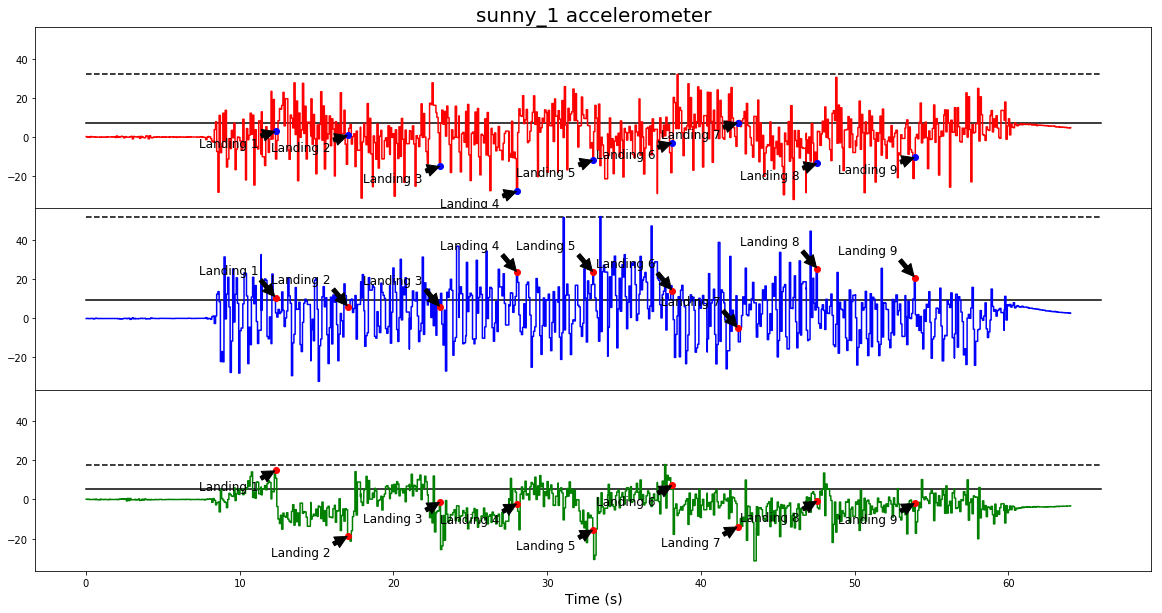

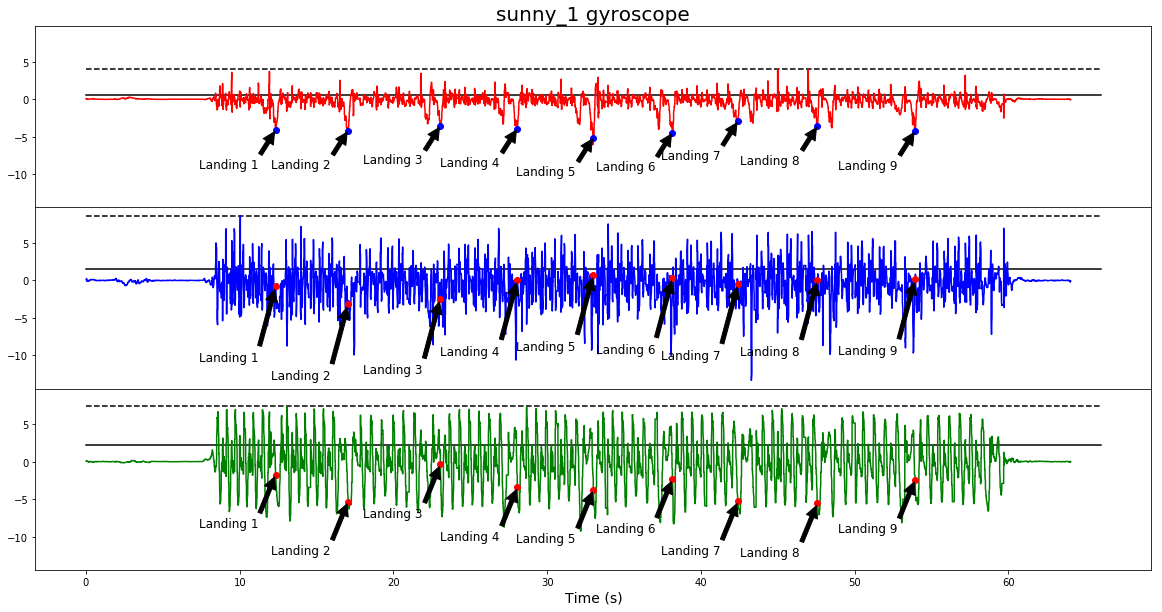

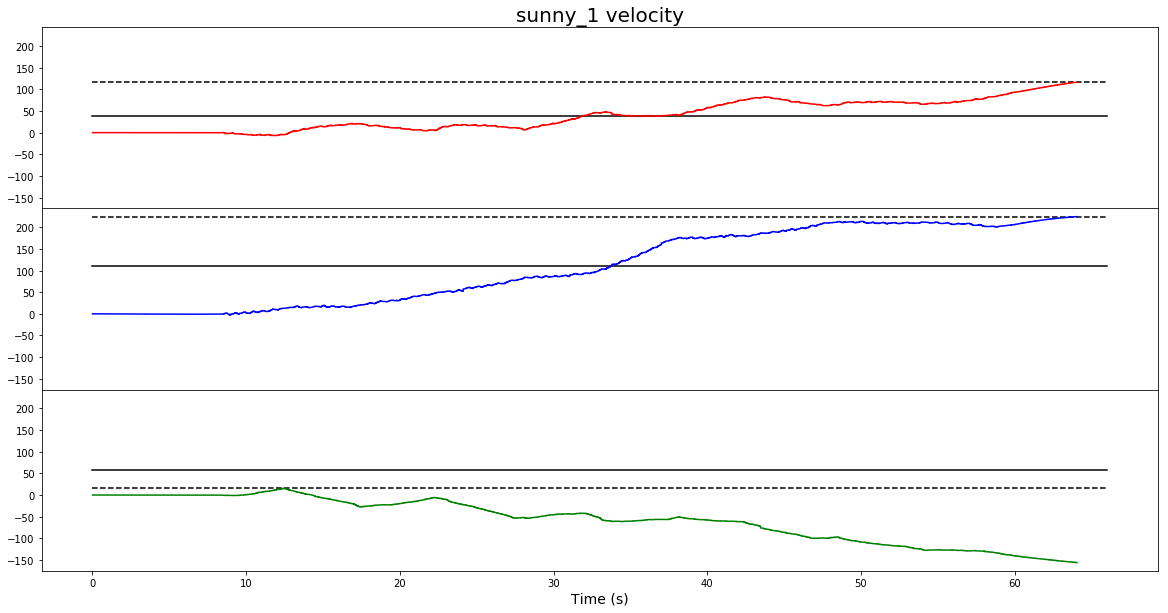

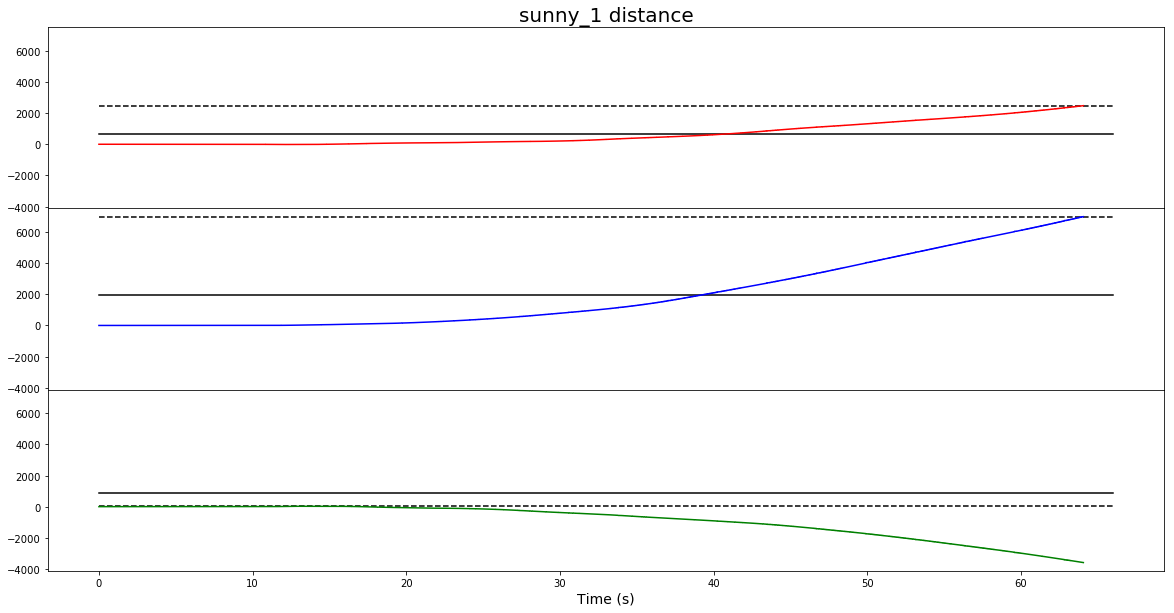

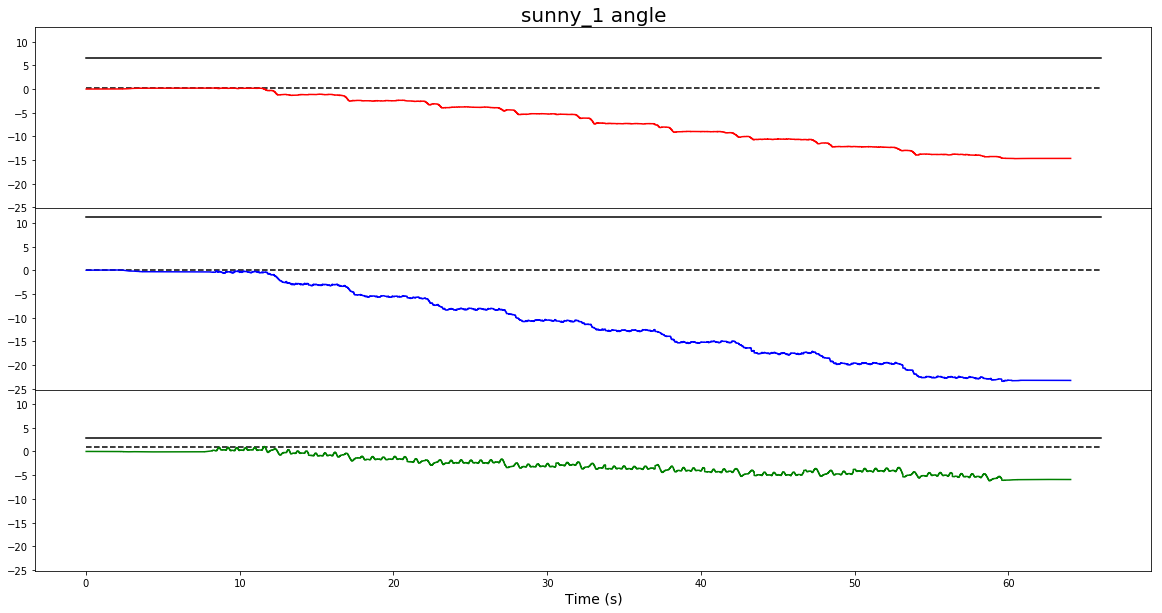

In [75]:
# plot sunny_1
### ACC ###
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True, figsize=(20,10))

for idx, row in avg.iterrows():
    if idx == 'sunny_1':
        ax1.plot((0,66),(row['ax'], row['ax']), 'k-')
        ax2.plot((0,66),(row['ay'], row['ay']), 'k-')
        ax3.plot((0,66),(row['az'], row['az']), 'k-')
    
for idx, row in maxs.iterrows():
    if idx == 'sunny_1':
        ax1.plot((0,66),(row['ax'], row['ax']), 'k--')
        ax2.plot((0,66),(row['ay'], row['ay']), 'k--')
        ax3.plot((0,66),(row['az'], row['az']), 'k--')
        
ax1.plot(sunny_1['time'], sunny_1['ax'], 'r-')
ax2.plot(sunny_1['time'], sunny_1['ay'], 'b-')
ax3.plot(sunny_1['time'], sunny_1['az'], 'g-')

ax1.plot(landings_sunny1['time'], landings_sunny1['ax'], 'bo')
ax2.plot(landings_sunny1['time'], landings_sunny1['ay'], 'ro')
ax3.plot(landings_sunny1['time'], landings_sunny1['az'], 'ro')

count = 1
for idx, row in landings_sunny1.iterrows():
    ax1.annotate('Landing {}'.format(count), (row['time'], row['ax']), xytext=(row['time']-5, row['ax']-8), arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12)
    ax2.annotate('Landing {}'.format(count), (row['time'], row['ay']), xytext=(row['time']-5, row['ay']+12), arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12)
    ax3.annotate('Landing {}'.format(count), (row['time'], row['az']), xytext=(row['time']-5, row['az']-10), arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12)
    count += 1

fig.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in fig.axes[:-1]], visible=False)
ax1.set_title('sunny_1 accelerometer', fontsize=20)
plt.xlabel('Time (s)', fontsize=14)
plt.show()

### GYRO ###
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True, figsize=(20,10))

for idx, row in avg.iterrows():
    if idx == 'sunny_1':
        ax1.plot((0,66),(row['wx'], row['wx']), 'k-')
        ax2.plot((0,66),(row['wy'], row['wy']), 'k-')
        ax3.plot((0,66),(row['wz'], row['wz']), 'k-')
    
for idx, row in maxs.iterrows():
    if idx == 'sunny_1':
        ax1.plot((0,66),(row['wx'], row['wx']), 'k--')
        ax2.plot((0,66),(row['wy'], row['wy']), 'k--')
        ax3.plot((0,66),(row['wz'], row['wz']), 'k--')

ax1.plot(sunny_1['time'], sunny_1['wx'], 'r-')
ax2.plot(sunny_1['time'], sunny_1['wy'], 'b-')
ax3.plot(sunny_1['time'], sunny_1['wz'], 'g-')

ax1.plot(landings_sunny1['time'], landings_sunny1['wx'], 'bo')
ax2.plot(landings_sunny1['time'], landings_sunny1['wy'], 'ro')
ax3.plot(landings_sunny1['time'], landings_sunny1['wz'], 'ro')

count = 1
for idx, row in landings_sunny1.iterrows():
    ax1.annotate('Landing {}'.format(count), (row['time'], row['wx']), xytext=(row['time']-5, row['wx']-5), arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12)
    ax2.annotate('Landing {}'.format(count), (row['time'], row['wy']), xytext=(row['time']-5, row['wy']-10), arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12)
    ax3.annotate('Landing {}'.format(count), (row['time'], row['wz']), xytext=(row['time']-5, row['wz']-7), arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12)
    count += 1

# Fine-tune figure; make subplots close to each other and hide x ticks for all but bottom plot.
fig.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in fig.axes[:-1]], visible=False)

ax1.set_title('sunny_1 gyroscope', fontsize=20)
plt.xlabel('Time (s)', fontsize=14)
plt.show()

### VELO ###
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True, figsize=(20,10))

for idx, row in avg.iterrows():
    if idx == 'sunny_1':
        ax1.plot((0,66),(row['ax_1'], row['ax_1']), 'k-')
        ax2.plot((0,66),(row['ay_1'], row['ay_1']), 'k-')
        ax3.plot((0,66),(row['az_1'], row['az_1']), 'k-')
    
for idx, row in maxs.iterrows():
    if idx == 'sunny_1':
        ax1.plot((0,66),(row['ax_1'], row['ax_1']), 'k--')
        ax2.plot((0,66),(row['ay_1'], row['ay_1']), 'k--')
        ax3.plot((0,66),(row['az_1'], row['az_1']), 'k--')
        
ax1.plot(sunny_1_int1['time'], sunny_1_int1['ax_1'], 'r-')
ax2.plot(sunny_1_int1['time'], sunny_1_int1['ay_1'], 'b-')
ax3.plot(sunny_1_int1['time'], sunny_1_int1['az_1'], 'g-')

fig.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in fig.axes[:-1]], visible=False)
ax1.set_title('sunny_1 velocity', fontsize=20)
plt.xlabel('Time (s)', fontsize=14)
plt.show()

### DIST ###
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True, figsize=(20,10))

for idx, row in avg.iterrows():
    if idx == 'sunny_1':
        ax1.plot((0,66),(row['ax_2'], row['ax_2']), 'k-')
        ax2.plot((0,66),(row['ay_2'], row['ay_2']), 'k-')
        ax3.plot((0,66),(row['az_2'], row['az_2']), 'k-')
    
for idx, row in maxs.iterrows():
    if idx == 'sunny_1':
        ax1.plot((0,66),(row['ax_2'], row['ax_2']), 'k--')
        ax2.plot((0,66),(row['ay_2'], row['ay_2']), 'k--')
        ax3.plot((0,66),(row['az_2'], row['az_2']), 'k--')
        
ax1.plot(sunny_1_int2['time'], sunny_1_int2['ax_2'], 'r-')
ax2.plot(sunny_1_int2['time'], sunny_1_int2['ay_2'], 'b-')
ax3.plot(sunny_1_int2['time'], sunny_1_int2['az_2'], 'g-')

fig.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in fig.axes[:-1]], visible=False)
ax1.set_title('sunny_1 distance', fontsize=20)
plt.xlabel('Time (s)', fontsize=14)
plt.show()

### ANGLE ###
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True, figsize=(20,10))

for idx, row in avg.iterrows():
    if idx == 'sunny_1':
        ax1.plot((0,66),(row['wx_1'], row['wx_1']), 'k-')
        ax2.plot((0,66),(row['wy_1'], row['wy_1']), 'k-')
        ax3.plot((0,66),(row['wz_1'], row['wz_1']), 'k-')
    
for idx, row in maxs.iterrows():
    if idx == 'sunny_1':
        ax1.plot((0,66),(row['wx_1'], row['wx_1']), 'k--')
        ax2.plot((0,66),(row['wy_1'], row['wy_1']), 'k--')
        ax3.plot((0,66),(row['wz_1'], row['wz_1']), 'k--')
        
ax1.plot(sunny_1_int1['time'], sunny_1_int1['wx_1'], 'r-')
ax2.plot(sunny_1_int1['time'], sunny_1_int1['wy_1'], 'b-')
ax3.plot(sunny_1_int1['time'], sunny_1_int1['wz_1'], 'g-')

fig.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in fig.axes[:-1]], visible=False)
ax1.set_title('sunny_1 angle', fontsize=20)
plt.xlabel('Time (s)', fontsize=14)
plt.show()

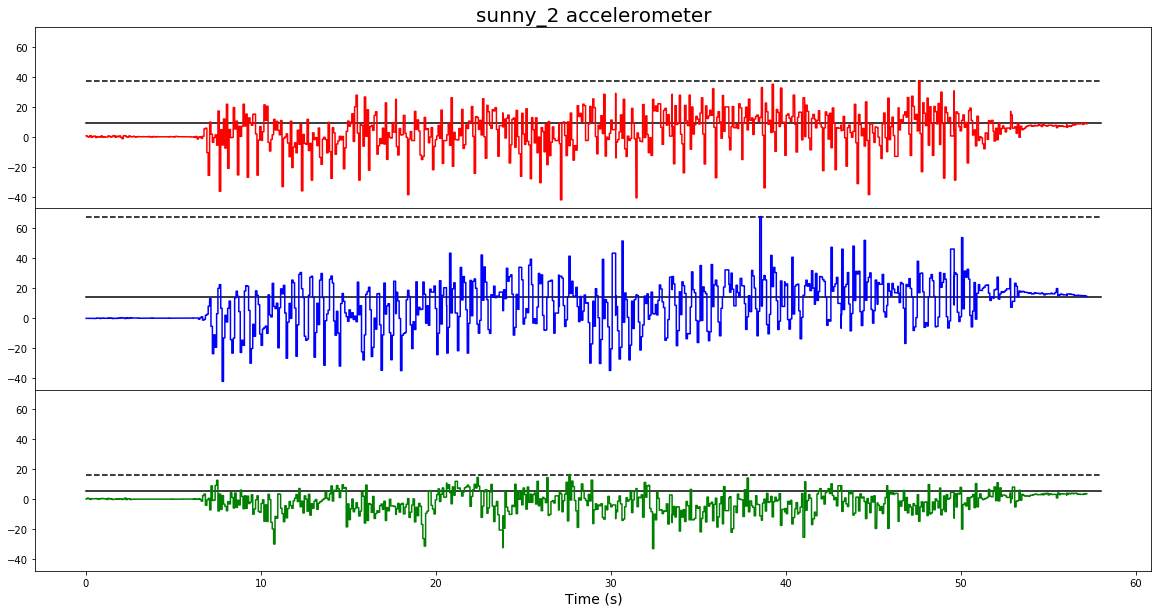

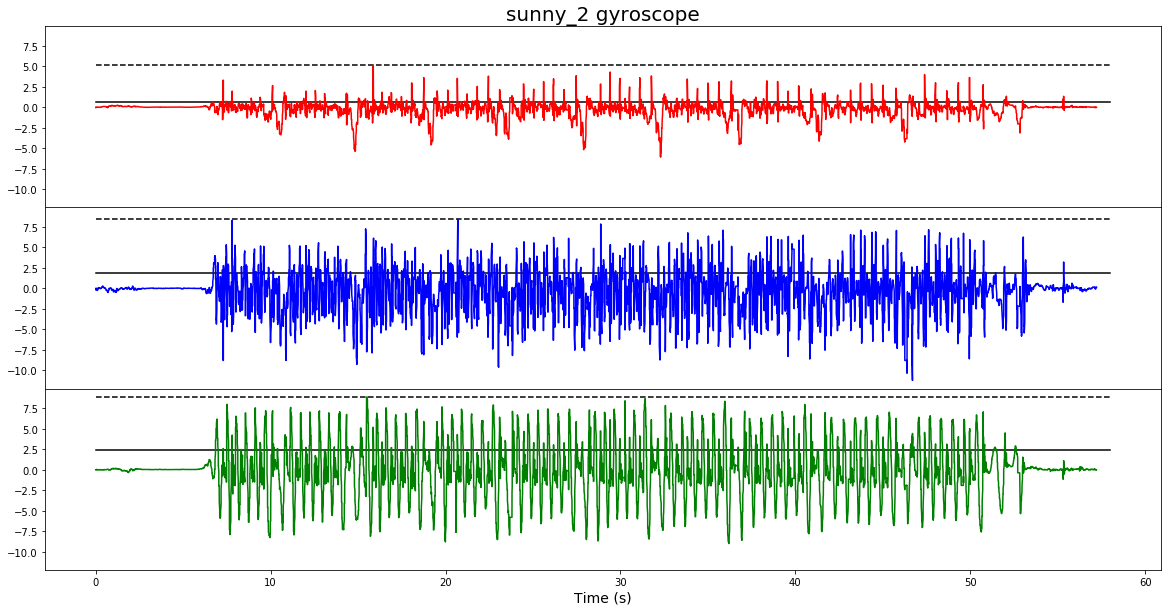

In [34]:
# plot sunny_2
### ACC ###
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True, figsize=(20,10))

for idx, row in avg.iterrows():
    if idx == 'sunny_2':
        ax1.plot((0,58),(row['ax'], row['ax']), 'k-')
        ax2.plot((0,58),(row['ay'], row['ay']), 'k-')
        ax3.plot((0,58),(row['az'], row['az']), 'k-')
    
for idx, row in maxs.iterrows():
    if idx == 'sunny_2':
        ax1.plot((0,58),(row['ax'], row['ax']), 'k--')
        ax2.plot((0,58),(row['ay'], row['ay']), 'k--')
        ax3.plot((0,58),(row['az'], row['az']), 'k--')

ax1.plot(sunny_2['time'], sunny_2['ax'], 'r-')
ax2.plot(sunny_2['time'], sunny_2['ay'], 'b-')
ax3.plot(sunny_2['time'], sunny_2['az'], 'g-')
# Fine-tune figure; make subplots close to each other and hide x ticks for all but bottom plot.
fig.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in fig.axes[:-1]], visible=False)

ax1.set_title('sunny_2 accelerometer', fontsize=20)
plt.xlabel('Time (s)', fontsize=14)
plt.show()

### GYRO ###
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True, figsize=(20,10))

for idx, row in avg.iterrows():
    if idx == 'sunny_2':
        ax1.plot((0,58),(row['wx'], row['wx']), 'k-')
        ax2.plot((0,58),(row['wy'], row['wy']), 'k-')
        ax3.plot((0,58),(row['wz'], row['wz']), 'k-')
    
for idx, row in maxs.iterrows():
    if idx == 'sunny_2':
        ax1.plot((0,58),(row['wx'], row['wx']), 'k--')
        ax2.plot((0,58),(row['wy'], row['wy']), 'k--')
        ax3.plot((0,58),(row['wz'], row['wz']), 'k--')

ax1.plot(sunny_2['time'], sunny_2['wx'], 'r-')
ax2.plot(sunny_2['time'], sunny_2['wy'], 'b-')
ax3.plot(sunny_2['time'], sunny_2['wz'], 'g-')
# Fine-tune figure; make subplots close to each other and hide x ticks for all but bottom plot.
fig.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in fig.axes[:-1]], visible=False)

ax1.set_title('sunny_2 gyroscope', fontsize=20)
plt.xlabel('Time (s)', fontsize=14)
plt.show()

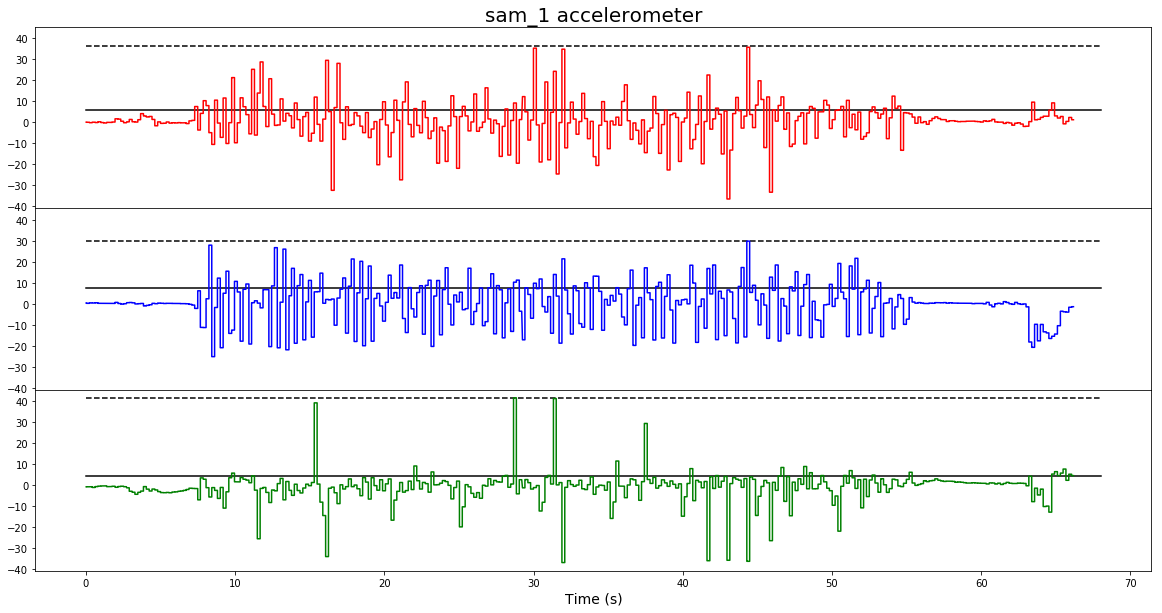

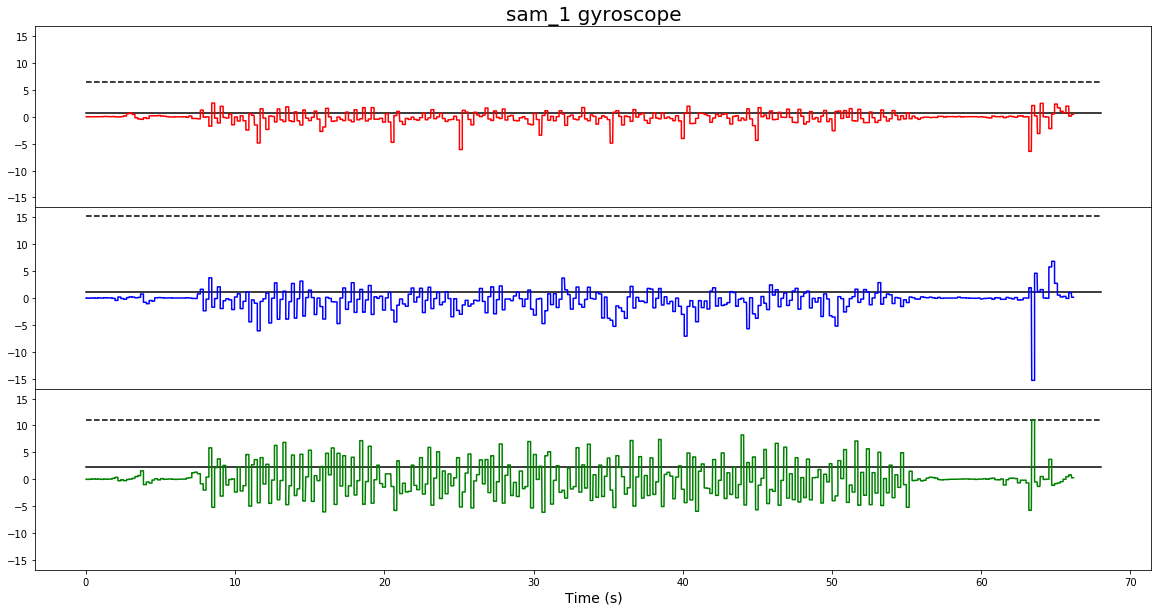

In [90]:
# plot sam_1
### ACC ###
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True, figsize=(20,10))

for idx, row in avg.iterrows():
    if idx == 'sam_1':
        ax1.plot((0,68),(row['ax'], row['ax']), 'k-')
        ax2.plot((0,68),(row['ay'], row['ay']), 'k-')
        ax3.plot((0,68),(row['az'], row['az']), 'k-')
    
for idx, row in maxs.iterrows():
    if idx == 'sam_1':
        ax1.plot((0,68),(row['ax'], row['ax']), 'k--')
        ax2.plot((0,68),(row['ay'], row['ay']), 'k--')
        ax3.plot((0,68),(row['az'], row['az']), 'k--')

ax1.plot(sam_1['time'], sam_1['ax'], 'r-')
ax2.plot(sam_1['time'], sam_1['ay'], 'b-')
ax3.plot(sam_1['time'], sam_1['az'], 'g-')
# Fine-tune figure; make subplots close to each other and hide x ticks for all but bottom plot.
fig.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in fig.axes[:-1]], visible=False)

ax1.set_title('sam_1 accelerometer', fontsize=20)
plt.xlabel('Time (s)', fontsize=14)
plt.show()

### GYRO ###
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True, figsize=(20,10))

for idx, row in avg.iterrows():
    if idx == 'sam_1':
        ax1.plot((0,68),(row['wx'], row['wx']), 'k-')
        ax2.plot((0,68),(row['wy'], row['wy']), 'k-')
        ax3.plot((0,68),(row['wz'], row['wz']), 'k-')
    
for idx, row in maxs.iterrows():
    if idx == 'sam_1':
        ax1.plot((0,68),(row['wx'], row['wx']), 'k--')
        ax2.plot((0,68),(row['wy'], row['wy']), 'k--')
        ax3.plot((0,68),(row['wz'], row['wz']), 'k--')

ax1.plot(sam_1['time'], sam_1['wx'], 'r-')
ax2.plot(sam_1['time'], sam_1['wy'], 'b-')
ax3.plot(sam_1['time'], sam_1['wz'], 'g-')
# Fine-tune figure; make subplots close to each other and hide x ticks for all but bottom plot.
fig.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in fig.axes[:-1]], visible=False)

ax1.set_title('sam_1 gyroscope', fontsize=20)
plt.xlabel('Time (s)', fontsize=14)
plt.show()

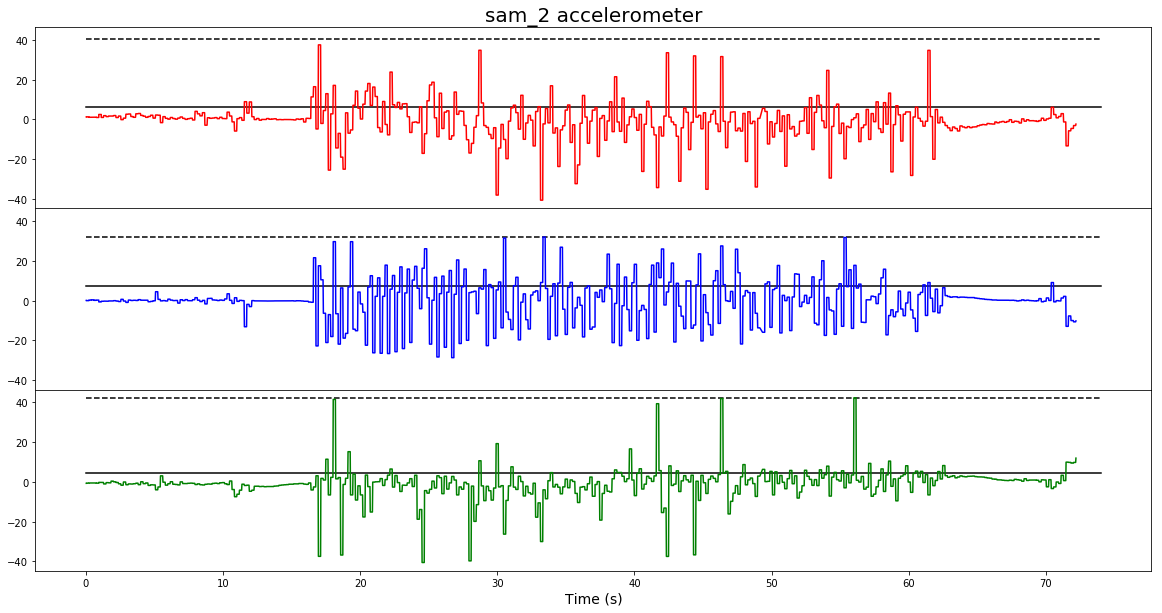

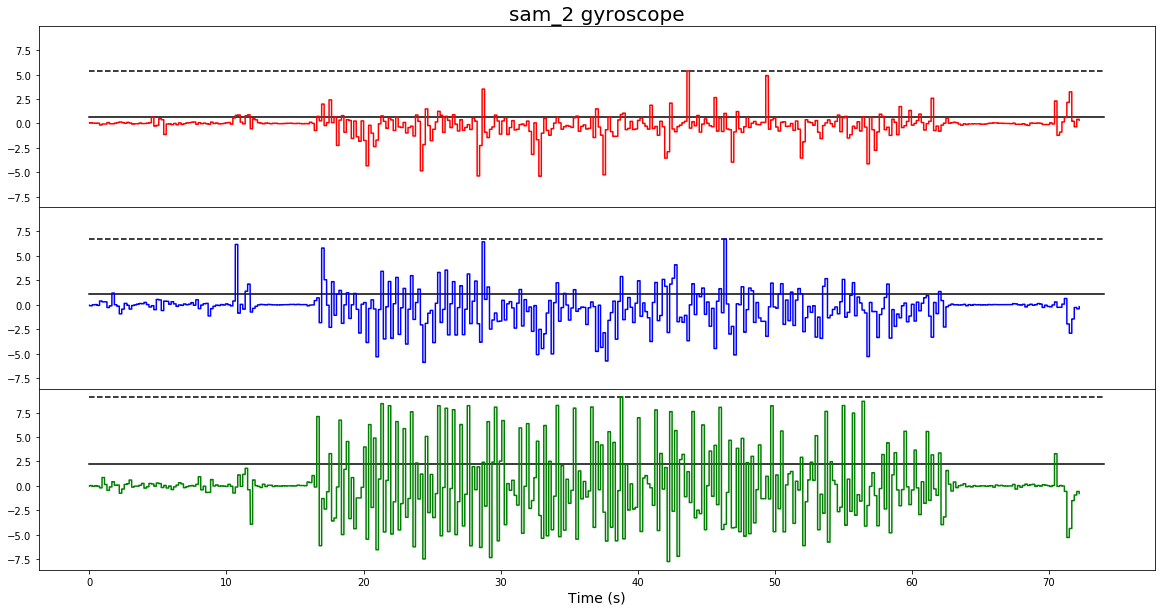

In [91]:
# plot sam_2
### ACC ###
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True, figsize=(20,10))

for idx, row in avg.iterrows():
    if idx == 'sam_2':
        ax1.plot((0,74),(row['ax'], row['ax']), 'k-')
        ax2.plot((0,74),(row['ay'], row['ay']), 'k-')
        ax3.plot((0,74),(row['az'], row['az']), 'k-')
    
for idx, row in maxs.iterrows():
    if idx == 'sam_2':
        ax1.plot((0,74),(row['ax'], row['ax']), 'k--')
        ax2.plot((0,74),(row['ay'], row['ay']), 'k--')
        ax3.plot((0,74),(row['az'], row['az']), 'k--')

ax1.plot(sam_2['time'], sam_2['ax'], 'r-')
ax2.plot(sam_2['time'], sam_2['ay'], 'b-')
ax3.plot(sam_2['time'], sam_2['az'], 'g-')
# Fine-tune figure; make subplots close to each other and hide x ticks for all but bottom plot.
fig.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in fig.axes[:-1]], visible=False)

ax1.set_title('sam_2 accelerometer', fontsize=20)
plt.xlabel('Time (s)', fontsize=14)
plt.show()

### GYRO ###
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True, figsize=(20,10))

for idx, row in avg.iterrows():
    if idx == 'sam_2':
        ax1.plot((0,74),(row['wx'], row['wx']), 'k-')
        ax2.plot((0,74),(row['wy'], row['wy']), 'k-')
        ax3.plot((0,74),(row['wz'], row['wz']), 'k-')
    
for idx, row in maxs.iterrows():
    if idx == 'sam_2':
        ax1.plot((0,74),(row['wx'], row['wx']), 'k--')
        ax2.plot((0,74),(row['wy'], row['wy']), 'k--')
        ax3.plot((0,74),(row['wz'], row['wz']), 'k--')

ax1.plot(sam_2['time'], sam_2['wx'], 'r-')
ax2.plot(sam_2['time'], sam_2['wy'], 'b-')
ax3.plot(sam_2['time'], sam_2['wz'], 'g-')
# Fine-tune figure; make subplots close to each other and hide x ticks for all but bottom plot.
fig.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in fig.axes[:-1]], visible=False)

ax1.set_title('sam_2 gyroscope', fontsize=20)
plt.xlabel('Time (s)', fontsize=14)
plt.show()  

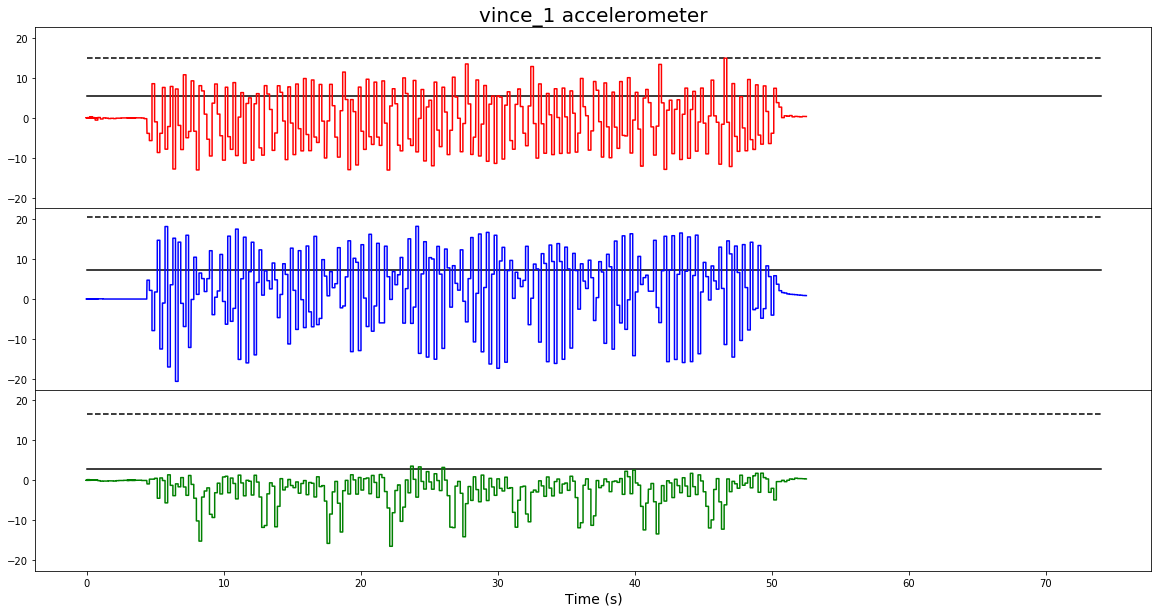

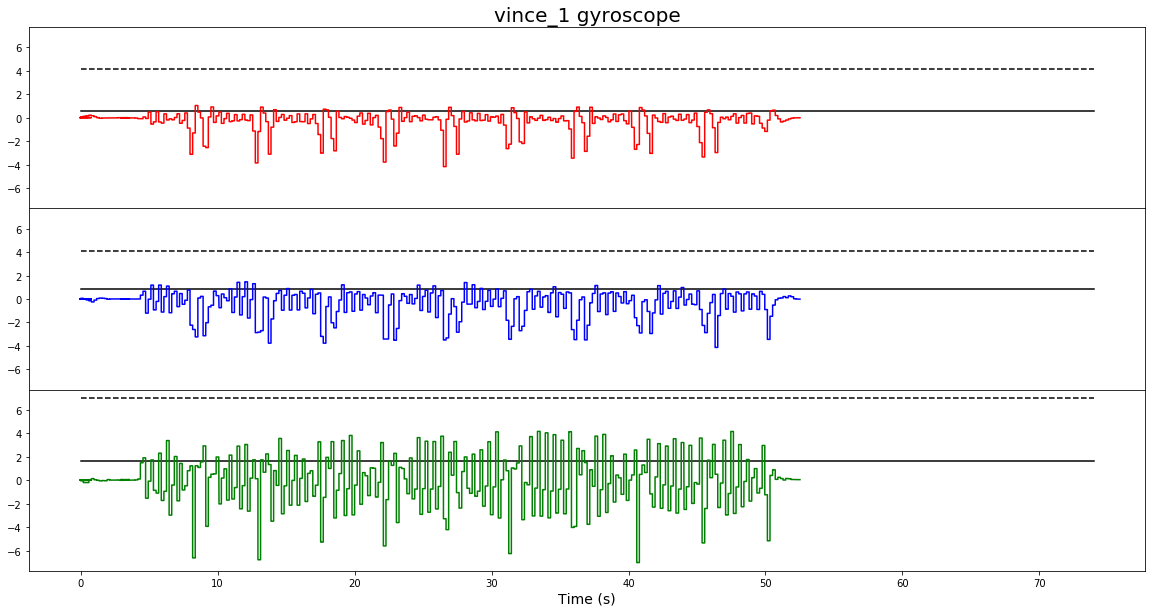

In [103]:
# plot vince_1
### ACC ###
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True, figsize=(20,10))

for idx, row in avg.iterrows():
    if idx == 'vince_1':
        ax1.plot((0,74),(row['ax'], row['ax']), 'k-')
        ax2.plot((0,74),(row['ay'], row['ay']), 'k-')
        ax3.plot((0,74),(row['az'], row['az']), 'k-')
    
for idx, row in maxs.iterrows():
    if idx == 'vince_1':
        ax1.plot((0,74),(row['ax'], row['ax']), 'k--')
        ax2.plot((0,74),(row['ay'], row['ay']), 'k--')
        ax3.plot((0,74),(row['az'], row['az']), 'k--')

ax1.plot(vince_1['time'], vince_1['ax'], 'r-')
ax2.plot(vince_1['time'], vince_1['ay'], 'b-')
ax3.plot(vince_1['time'], vince_1['az'], 'g-')
# Fine-tune figure; make subplots close to each other and hide x ticks for all but bottom plot.
fig.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in fig.axes[:-1]], visible=False)

ax1.set_title('vince_1 accelerometer', fontsize=20)
plt.xlabel('Time (s)', fontsize=14)
plt.show()

### GYRO ###
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True, figsize=(20,10))

for idx, row in avg.iterrows():
    if idx == 'vince_1':
        ax1.plot((0,74),(row['wx'], row['wx']), 'k-')
        ax2.plot((0,74),(row['wy'], row['wy']), 'k-')
        ax3.plot((0,74),(row['wz'], row['wz']), 'k-')
    
for idx, row in maxs.iterrows():
    if idx == 'vince_1':
        ax1.plot((0,74),(row['wx'], row['wx']), 'k--')
        ax2.plot((0,74),(row['wy'], row['wy']), 'k--')
        ax3.plot((0,74),(row['wz'], row['wz']), 'k--')

ax1.plot(vince_1['time'], vince_1['wx'], 'r-')
ax2.plot(vince_1['time'], vince_1['wy'], 'b-')
ax3.plot(vince_1['time'], vince_1['wz'], 'g-')
# Fine-tune figure; make subplots close to each other and hide x ticks for all but bottom plot.
fig.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in fig.axes[:-1]], visible=False)

ax1.set_title('vince_1 gyroscope', fontsize=20)
plt.xlabel('Time (s)', fontsize=14)
plt.show()  